In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(10)
# sns.pairplot(df,hue='Purchased')

,User ID,Gender,Age,EstimatedSalary,Purchased
317,15684861,Male,35,55000,0
31,15729054,Female,27,137000,1
290,15586757,Male,39,134000,1
26,15792818,Male,49,28000,1
362,15768072,Female,47,50000,1
99,15756820,Female,28,37000,0
135,15578006,Male,23,63000,0
223,15593715,Male,60,102000,1
130,15675185,Male,31,58000,0
117,15591433,Male,36,52000,0


In [37]:
df=df.iloc[:,2:]

In [38]:
df.sample(5)

,Age,EstimatedSalary,Purchased
306,51,134000,0
390,48,33000,1
18,46,28000,1
332,42,65000,0
11,26,52000,0


## Train test split

In [39]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
#                                                     df['Purchased'],
#                                                     test_size=0.3,
#                                                     random_state=0)

# X_train.shape, X_test.shape



In [40]:
X=df.iloc[:,0:2]
X


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [41]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)

In [45]:
scaler.mean_


array([3.79428571e+01, 6.98107143e+04])

In [46]:
X_train
# this is pandas data frame

,Age,EstimatedSalary
194,28,89000
386,49,39000
4,19,76000
37,30,49000
249,35,97000
...,...,...
157,29,75000
109,38,80000
243,56,104000
30,31,74000


In [47]:
X_train_scaled
# this is an numpy


array([[-0.93232859,  0.5756676 ],
       [ 1.0368137 , -0.92430382],
       [-1.77624672,  0.18567503],
       [-0.74479123, -0.62430953],
       [-0.27594783,  0.81566303],
       [ 0.00535821, -0.32431525],
       [ 1.78696314, -1.10430039],
       [ 1.88073182, -0.68430839],
       [ 0.94304502,  2.13563788],
       [ 0.28666425,  0.51566875],
       [-0.65102255,  0.18567503],
       [-0.08841047,  0.30567275],
       [ 1.13058238, -1.0143021 ],
       [-0.08841047,  0.27567332],
       [ 0.00535821, -0.5943101 ],
       [-0.08841047, -1.10430039],
       [-1.02609727,  0.54566817],
       [-1.11986596,  0.06567732],
       [-0.93232859, -1.13429981],
       [ 0.94304502,  1.47565045],
       [ 1.31811974,  2.04563959],
       [-1.58870936, -1.61429067],
       [-1.77624672, -1.46429353],
       [ 1.0368137 , -1.0143021 ],
       [-1.401172  , -0.11431925],
       [-1.30740332, -1.13429981],
       [-0.93232859,  0.27567332],
       [-1.401172  ,  0.3656716 ],
       [ 1.59942578,

In [48]:
# convert numpy to data frame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [49]:
np.round(X_train.describe(), 1)
# just round of to 1 decimal number
# X_train.describe()


,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69810.7
std,10.7,33393.7
min,18.0,15000.0
25%,30.0,43750.0
50%,37.0,70500.0
75%,47.0,88000.0
max,60.0,149000.0


In [50]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


# Effect of Scaling

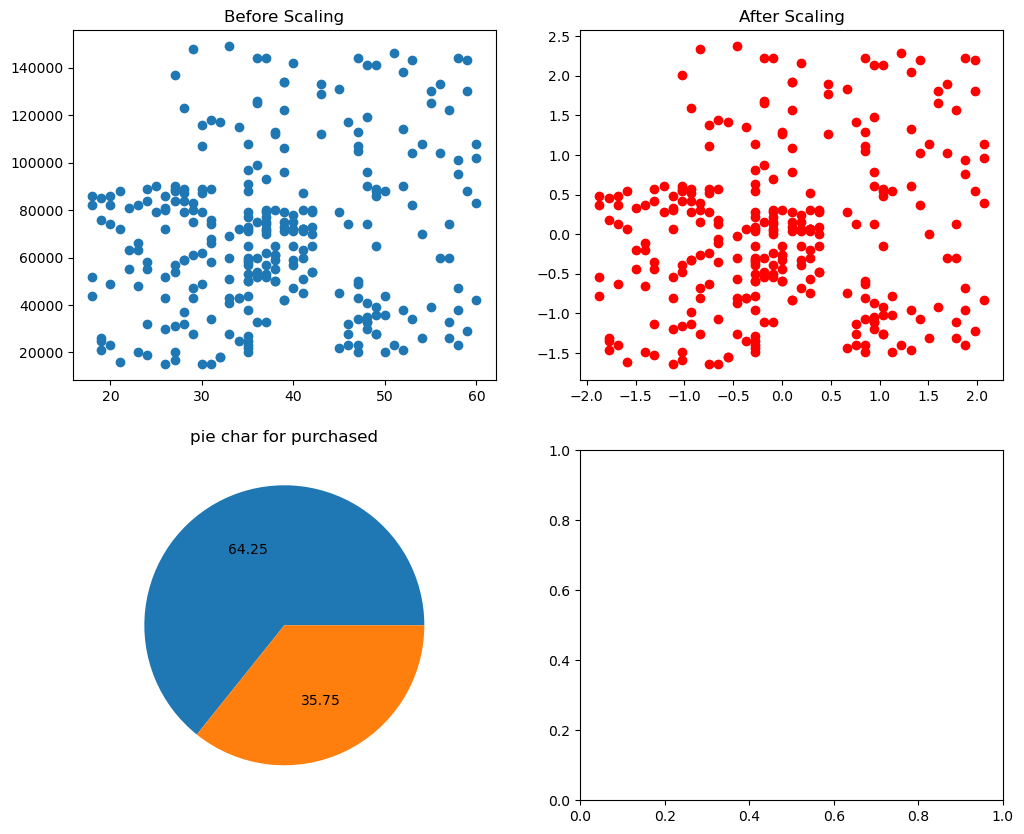

In [94]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots( nrows=2, ncols=2, figsize=(12, 10))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
ax3.pie(y.value_counts(),autopct="%.2f")
ax3.set_title("pie char for purchased")
plt.show()
# fig


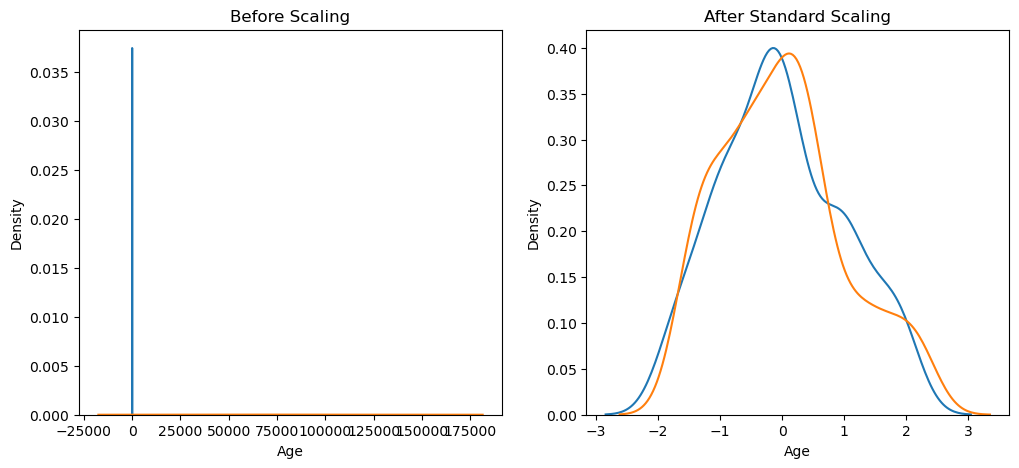

In [98]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')

sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()
# pdf is shown
# age is in within very small range hence it's a straight vertical line while salary is in very large range hance it is in vertical line in before scaling..but after scaling..they are comparable now..

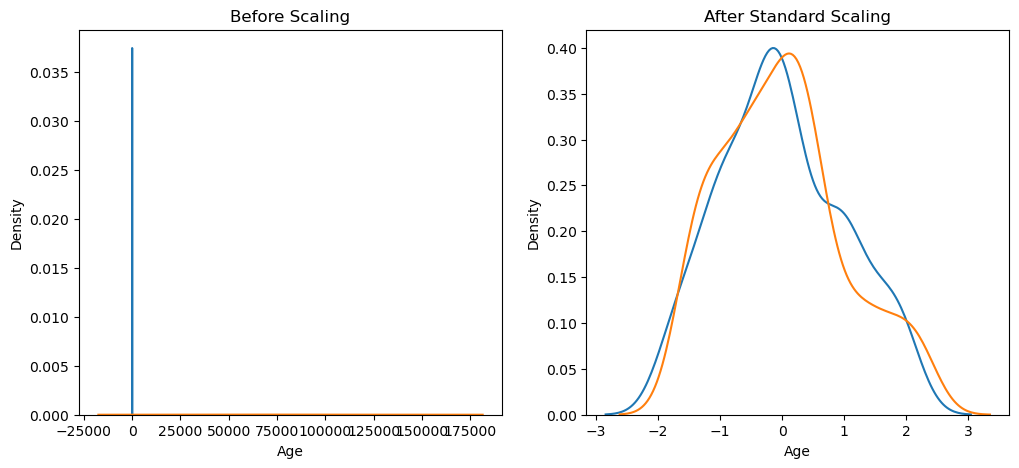

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')

sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()
# pdf is shown
# age is in within very small range hence it's a straight vertical line while salary is in very large range hance it is in vertical line in before scaling..but after scaling..they are comparable now..

# Comparison of Distributions

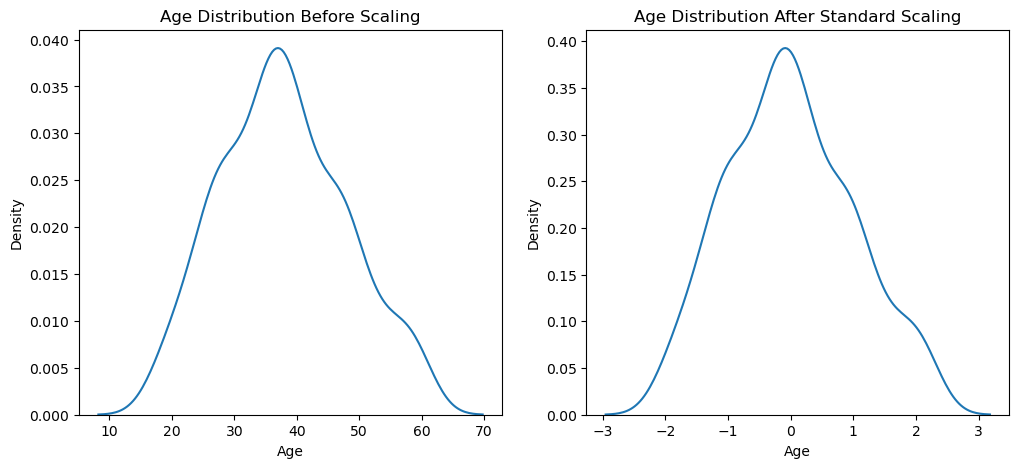

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

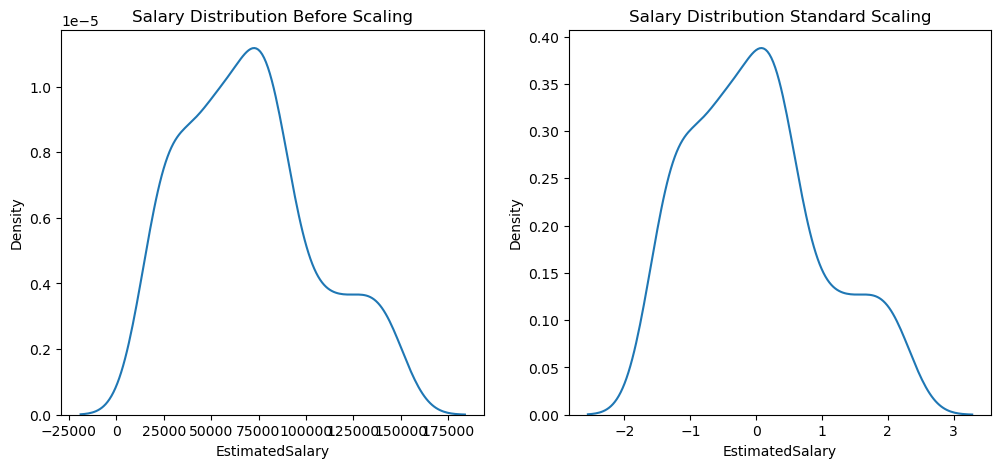

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Why scaling is important?

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.675
Scaled 0.875


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [29]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [31]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8833333333333333
Scaled 0.8833333333333333


In [32]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [33]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

/var/folders/w4/lbqrw9sd4j58jmmm2ls54fxm0000gn/T/ipykernel_78002/2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [34]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


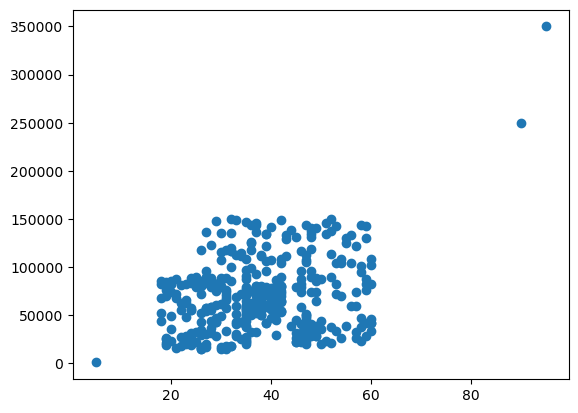

In [35]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

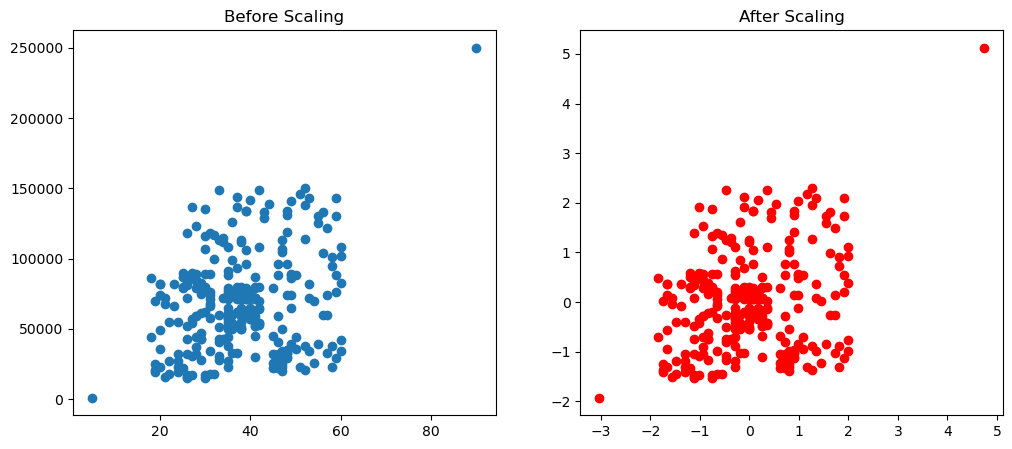

In [39]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()